Got it ✅ — let’s prepare  in a clear and explanatory way.
This will be a guided mini-project where you analyze sales data using **pandas**.

---

# 📒 Mini Project: Sales Analysis with Pandas
**`mini_project_sales_analysis.ipynb`**

# Mini Project: Sales Analysis with Pandas

In this project, we will analyze a sample **sales dataset** using pandas.  
The goals are to:
1. Load and explore the dataset
2. Perform cleaning and preprocessing
3. Analyze sales trends (monthly, yearly, by product, by region)
4. Identify top-performing products/customers
5. Visualize insights

---


## 1. Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


---



## 2. Load the Dataset

👉 Assume we have a file `sales_data.csv` with the following columns:

* `OrderID`
* `OrderDate`
* `CustomerName`
* `Region`
* `Product`
* `Quantity`
* `UnitPrice`
* `Total`


In [14]:
import pandas as pd

df = pd.read_csv("sales_data.csv")
print(df.head())
print(df.columns)


    OrderDate     Product Region  Units_Sold  Unit_Price  Total_Sales  \
0  2023-02-21       Phone  South          12        1995        23940   
1  2023-04-03      Laptop   East           5         785         3925   
2  2023-01-15  Headphones  South          37        1915        70855   
3  2023-03-13  Headphones   East          32         725        23200   
4  2023-03-02  Headphones  North           9        1411        12699   

   Quantity  Total  
0        12  23940  
1         5   3925  
2        37  70855  
3        32  23200  
4         9  12699  
Index(['OrderDate', 'Product', 'Region', 'Units_Sold', 'Unit_Price',
       'Total_Sales', 'Quantity', 'Total'],
      dtype='object')


In [15]:
df = pd.read_csv("sales_data_aligned.csv", parse_dates=["OrderDate"])
df.head()


,OrderID,OrderDate,Product,Region,Units_Sold,UnitPrice,Total,Quantity,Total.1,CustomerName
0,1,2023-02-21,Phone,South,12,1995,23940,12,23940,Alice
1,2,2023-04-03,Laptop,East,5,785,3925,5,3925,Bob
2,3,2023-01-15,Headphones,South,37,1915,70855,37,70855,Charlie
3,4,2023-03-13,Headphones,East,32,725,23200,32,23200,David
4,5,2023-03-02,Headphones,North,9,1411,12699,9,12699,Eva


---


## 3. Data Overview

In [16]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderID       100 non-null    int64         
 1   OrderDate     100 non-null    datetime64[ns]
 2   Product       100 non-null    object        
 3   Region        100 non-null    object        
 4   Units_Sold    100 non-null    int64         
 5   UnitPrice     100 non-null    int64         
 6   Total         100 non-null    int64         
 7   Quantity      100 non-null    int64         
 8   Total.1       100 non-null    int64         
 9   CustomerName  100 non-null    object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 7.9+ KB


,OrderID,OrderDate,Product,Region,Units_Sold,UnitPrice,Total,Quantity,Total.1,CustomerName
count,100.000000,100,100,100,100.000000,100.000000,100.000000,100.000000,100.000000,100
unique,NaN,NaN,5,4,NaN,NaN,NaN,NaN,NaN,8
top,NaN,NaN,Laptop,West,NaN,NaN,NaN,NaN,NaN,Alice
freq,NaN,NaN,27,30,NaN,NaN,NaN,NaN,NaN,13
mean,50.500000,2023-02-20 12:57:36,NaN,NaN,27.500000,1083.040000,29790.990000,27.500000,29790.990000,NaN
min,1.000000,2023-01-02 00:00:00,NaN,NaN,2.000000,104.000000,1767.000000,2.000000,1767.000000,NaN
25%,25.750000,2023-01-23 12:00:00,NaN,NaN,18.000000,702.500000,12135.000000,18.000000,12135.000000,NaN
50%,50.500000,2023-02-23 00:00:00,NaN,NaN,29.500000,1027.500000,23672.500000,29.500000,23672.500000,NaN
75%,75.250000,2023-03-17 12:00:00,NaN,NaN,36.250000,1510.750000,41387.250000,36.250000,41387.250000,NaN
max,100.000000,2023-04-10 00:00:00,NaN,NaN,49.000000,1995.000000,95520.000000,49.000000,95520.000000,NaN



👉 Check for missing values:



In [17]:
df.isnull().sum()


OrderID         0
OrderDate       0
Product         0
Region          0
Units_Sold      0
UnitPrice       0
Total           0
Quantity        0
Total.1         0
CustomerName    0
dtype: int64


---

## 4. Data Cleaning

* Fill missing `Region` with `"Unknown"`
* Drop duplicates
* Ensure `Total = Quantity * UnitPrice`

In [18]:
df["Region"] = df["Region"].fillna("Unknown")
df.drop_duplicates(inplace=True)
df["Total"] = df["Quantity"] * df["UnitPrice"]


---

## 5. Exploratory Data Analysis (EDA)

### 5.1 Sales Over Time



C:\Users\hakha\AppData\Local\Temp\ipykernel_9324\2264643170.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df["Total"].resample("M").sum()


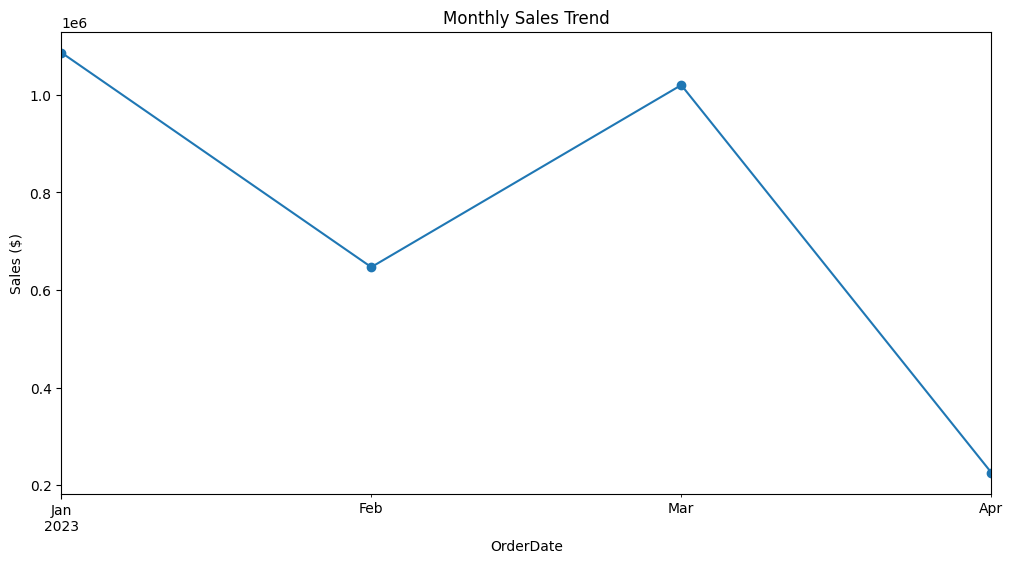

In [19]:
df.set_index("OrderDate", inplace=True)

monthly_sales = df["Total"].resample("M").sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker="o")
plt.title("Monthly Sales Trend")
plt.ylabel("Sales ($)")
plt.show()


---



### 5.2 Sales by Region



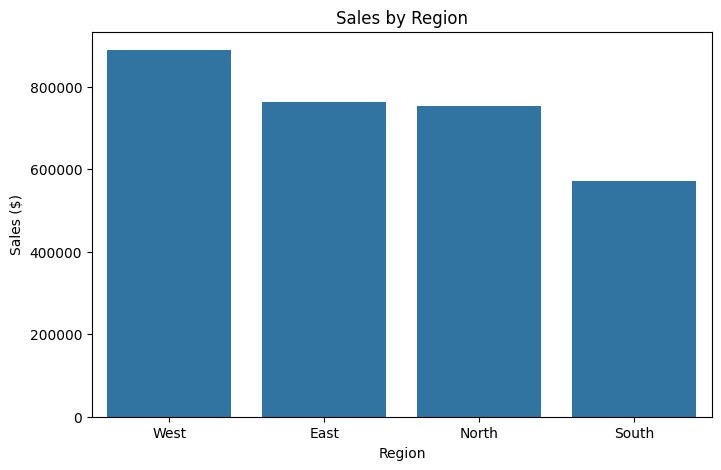

In [20]:
region_sales = df.groupby("Region")["Total"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Sales by Region")
plt.ylabel("Sales ($)")
plt.show()


---


### 5.3 Top 10 Products

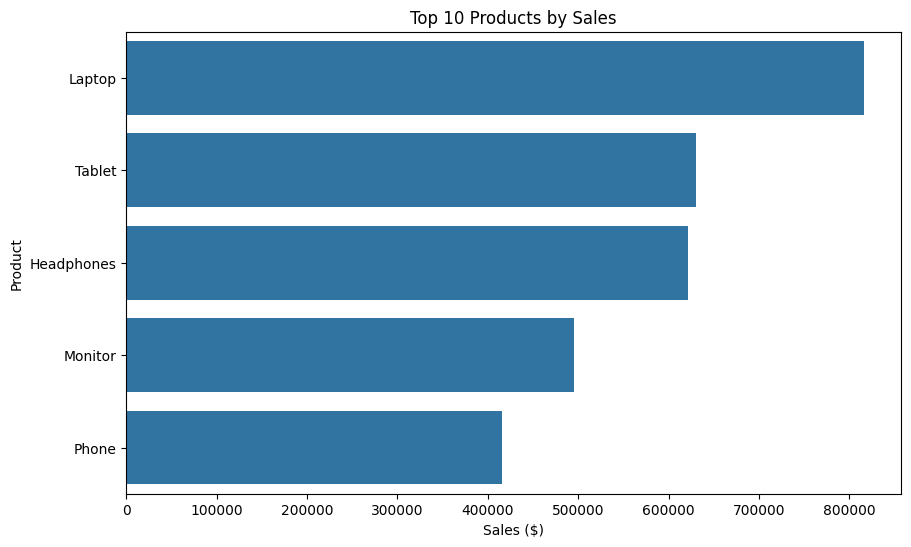

In [21]:
top_products = df.groupby("Product")["Total"].sum().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Sales")
plt.xlabel("Sales ($)")
plt.show()


---



### 5.4 Best Customers


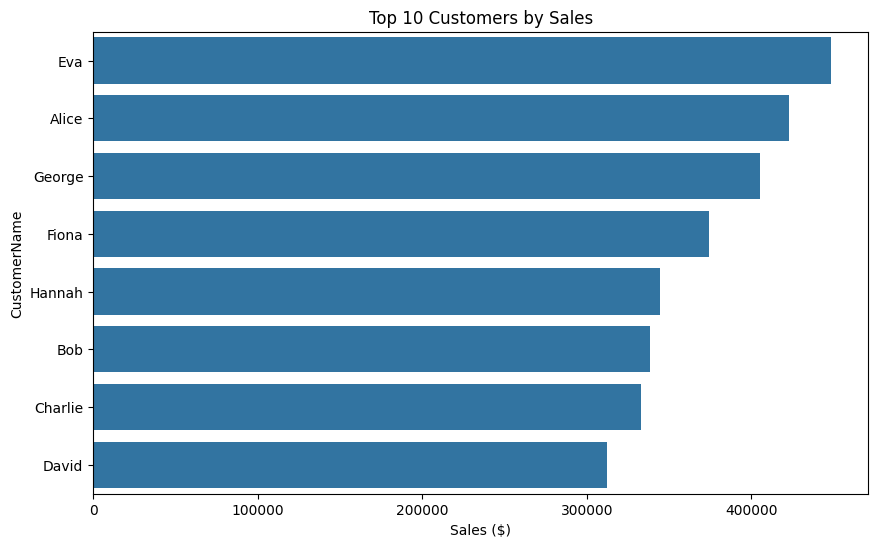

In [22]:

top_customers = df.groupby("CustomerName")["Total"].sum().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title("Top 10 Customers by Sales")
plt.xlabel("Sales ($)")
plt.show()



---



## 6. Advanced Analysis

### 6.1 Average Order Value (AOV)

In [23]:
aov = df.groupby("OrderID")["Total"].sum().mean()
print(f"Average Order Value: ${aov:.2f}")


Average Order Value: $29790.99


---



### 6.2 Yearly Growth



C:\Users\hakha\AppData\Local\Temp\ipykernel_9324\1480992005.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales = df["Total"].resample("Y").sum()


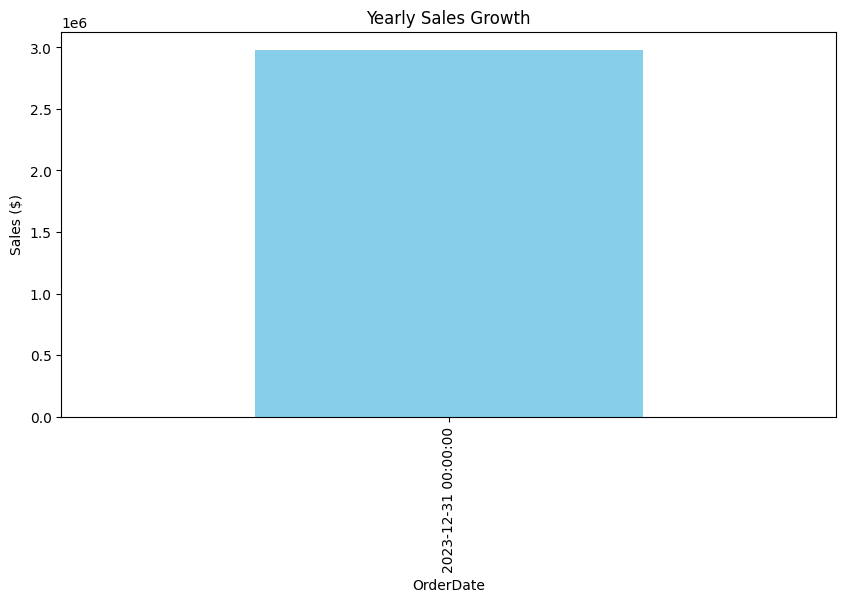

In [24]:
yearly_sales = df["Total"].resample("Y").sum()

plt.figure(figsize=(10,5))
yearly_sales.plot(kind="bar", color="skyblue")
plt.title("Yearly Sales Growth")
plt.ylabel("Sales ($)")
plt.show()



---



### 6.3 Product Performance by Region

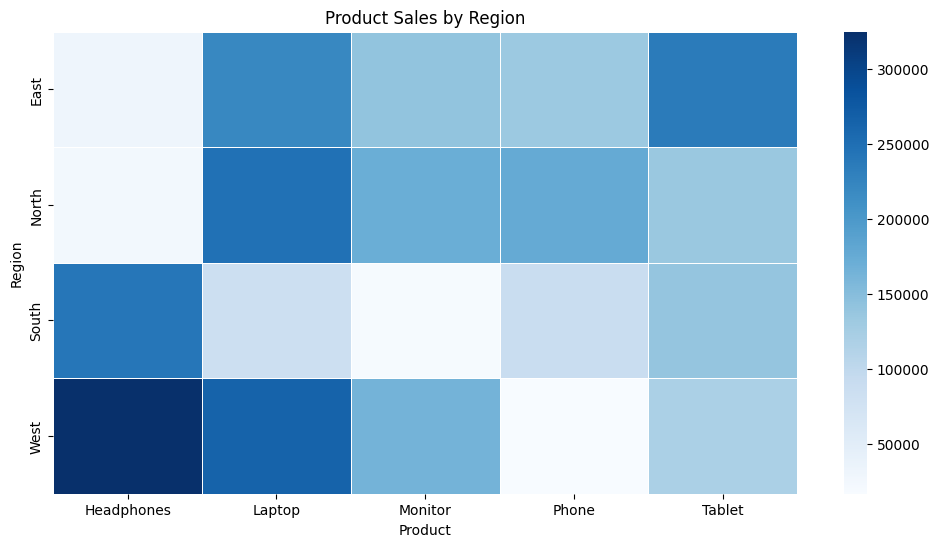

In [25]:
pivot = df.pivot_table(values="Total", index="Region", columns="Product", aggfunc="sum", fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="Blues", linewidths=0.5)
plt.title("Product Sales by Region")
plt.show()


---

## 7. Key Insights

* Monthly sales trend helps identify seasonality.
* Some regions contribute significantly more to total sales.
* A small number of products and customers generate most of the revenue (Pareto principle).
* Yearly sales growth shows overall business performance.

---



## 8. Next Steps

* Apply forecasting models to predict future sales.
* Perform customer segmentation using clustering.
* Optimize inventory based on sales trends.

---
